### Importação dos dados



In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Lava louças,eletrodomesticos,1446.46,74.604083,11/11/2022,Rafael Costa,SP,4,cartao_credito,3,-22.19,-48.79
1,Cama box,moveis,631.70,33.919251,03/01/2020,Thiago Silva,GO,5,cartao_credito,2,-15.98,-49.86
2,Bola de basquete,esporte e lazer,31.54,0.000000,25/12/2022,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
3,Modelagem preditiva,livros,76.93,1.680730,23/11/2021,Lucas Oliveira,MG,3,boleto,1,-18.10,-44.38
4,Fone de ouvido,eletronicos,185.14,7.442587,25/04/2022,Bianca Santos,SP,4,cartao_credito,7,-22.19,-48.79


#1. Análise do faturamento


In [5]:
# Calcula o faturamento de cada loja
faturamento_loja1 = loja["Preço"].sum()
faturamento_loja2 = loja2["Preço"].sum()
faturamento_loja3 = loja3["Preço"].sum()
faturamento_loja4 = loja4["Preço"].sum()

# Exibe os resultados
print(f"Faturamento Loja 1: R${faturamento_loja1:,.2f}")
print(f"Faturamento Loja 2: R${faturamento_loja2:,.2f}")
print(f"Faturamento Loja 3: R${faturamento_loja3:,.2f}")
print(f"Faturamento Loja 4: R${faturamento_loja4:,.2f}")

Faturamento Loja 1: R$1,534,509.12
Faturamento Loja 2: R$1,488,459.06
Faturamento Loja 3: R$1,464,025.03
Faturamento Loja 4: R$1,384,497.58


# 2. Vendas por Categoria


In [7]:
# Agrupa e conta os produtos por categoria em cada loja
categorias_loja1 = loja.groupby("Categoria do Produto")["Produto"].count().sort_values(ascending=False)
categorias_loja2 = loja2.groupby("Categoria do Produto")["Produto"].count().sort_values(ascending=False)
categorias_loja3 = loja3.groupby("Categoria do Produto")["Produto"].count().sort_values(ascending=False)
categorias_loja4 = loja4.groupby("Categoria do Produto")["Produto"].count().sort_values(ascending=False)

# Exibe as categorias mais populares em cada loja
print("\nCategorias mais vendidas - Loja 1:")
print(categorias_loja1)

print("\nCategorias mais vendidas - Loja 2:")
print(categorias_loja2)

print("\nCategorias mais vendidas - Loja 3:")
print(categorias_loja3)

print("\nCategorias mais vendidas - Loja 4:")
print(categorias_loja4)


Categorias mais vendidas - Loja 1:
Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: Produto, dtype: int64

Categorias mais vendidas - Loja 2:
Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: Produto, dtype: int64

Categorias mais vendidas - Loja 3:
Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: Produto, dtype: int64

Categorias mais vendidas - Loja 4:
Categoria do 

# 3. Média de Avaliação das Lojas

In [9]:
# Calcula a média das avaliações dos clientes por loja
media_avaliacao_loja1 = loja["Avaliação da compra"].mean()
media_avaliacao_loja2 = loja2["Avaliação da compra"].mean()
media_avaliacao_loja3 = loja3["Avaliação da compra"].mean()
media_avaliacao_loja4 = loja4["Avaliação da compra"].mean()

# Exibe as médias formatadas
print(f"Média de Avaliação - Loja 1: {media_avaliacao_loja1:.2f}")
print(f"Média de Avaliação - Loja 2: {media_avaliacao_loja2:.2f}")
print(f"Média de Avaliação - Loja 3: {media_avaliacao_loja3:.2f}")
print(f"Média de Avaliação - Loja 4: {media_avaliacao_loja4:.2f}")

Média de Avaliação - Loja 1: 3.98
Média de Avaliação - Loja 2: 4.04
Média de Avaliação - Loja 3: 4.05
Média de Avaliação - Loja 4: 4.00


# 4. Produtos Mais e Menos Vendidos

In [10]:
# Função para identificar o mais e o menos vendido
def identificar_vendas_extremas(df, nome_loja):
    vendas_produtos = df.groupby("Produto")["Produto"].count().sort_values(ascending=False)
    mais_vendido = vendas_produtos.idxmax()
    menos_vendido = vendas_produtos.idxmin()
    qtd_mais_vendido = vendas_produtos.max()
    qtd_menos_vendido = vendas_produtos.min()

    print(f"\nLoja: {nome_loja}")
    print(f"Produto mais vendido: {mais_vendido} ({qtd_mais_vendido} vendas)")
    print(f"Produto menos vendido: {menos_vendido} ({qtd_menos_vendido} vendas)")

# Aplicando a função para cada loja
identificar_vendas_extremas(loja, "Loja 1")
identificar_vendas_extremas(loja2, "Loja 2")
identificar_vendas_extremas(loja3, "Loja 3")
identificar_vendas_extremas(loja4, "Loja 4")


Loja: Loja 1
Produto mais vendido: TV Led UHD 4K (60 vendas)
Produto menos vendido: Celular ABXY (33 vendas)

Loja: Loja 2
Produto mais vendido: Iniciando em programação (65 vendas)
Produto menos vendido: Jogo de tabuleiro (32 vendas)

Loja: Loja 3
Produto mais vendido: Kit banquetas (57 vendas)
Produto menos vendido: Blocos de montar (35 vendas)

Loja: Loja 4
Produto mais vendido: Cama box (62 vendas)
Produto menos vendido: Guitarra (33 vendas)


# 5. Frete Médio por Loja


In [12]:
# Calcula o custo médio de frete por loja
frete_medio_loja1 = loja["Frete"].mean()
frete_medio_loja2 = loja2["Frete"].mean()
frete_medio_loja3 = loja3["Frete"].mean()
frete_medio_loja4 = loja4["Frete"].mean()

# Exibe os resultados
print(f"Custo médio de frete - Loja 1: R${frete_medio_loja1:.2f}")
print(f"Custo médio de frete - Loja 2: R${frete_medio_loja2:.2f}")
print(f"Custo médio de frete - Loja 3: R${frete_medio_loja3:.2f}")
print(f"Custo médio de frete - Loja 4: R${frete_medio_loja4:.2f}")


Custo médio de frete - Loja 1: R$34.69
Custo médio de frete - Loja 2: R$33.62
Custo médio de frete - Loja 3: R$33.07
Custo médio de frete - Loja 4: R$31.28


#Gráfico 1 - Faturamento por Lojas (barras)

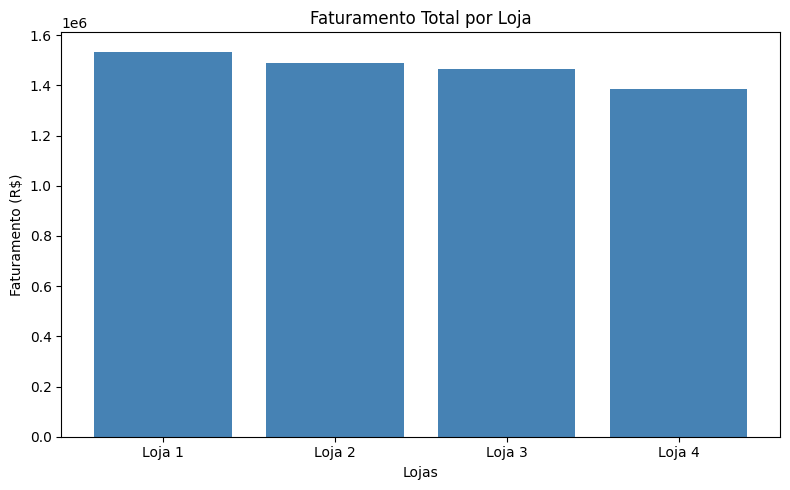

In [13]:
import matplotlib.pyplot as plt
faturamentos = {
    'Loja 1': loja["Preço"].sum(),
    'Loja 2': loja2["Preço"].sum(),
    'Loja 3': loja3["Preço"].sum(),
    'Loja 4': loja4["Preço"].sum()
}

plt.figure(figsize=(8, 5))
plt.bar(faturamentos.keys(), faturamentos.values(), color='steelblue')
plt.title("Faturamento Total por Loja")
plt.ylabel("Faturamento (R$)")
plt.xlabel("Lojas")
plt.tight_layout()
plt.show()


# Gráfico 2 - Distribuição de categorias por loja (pizza)

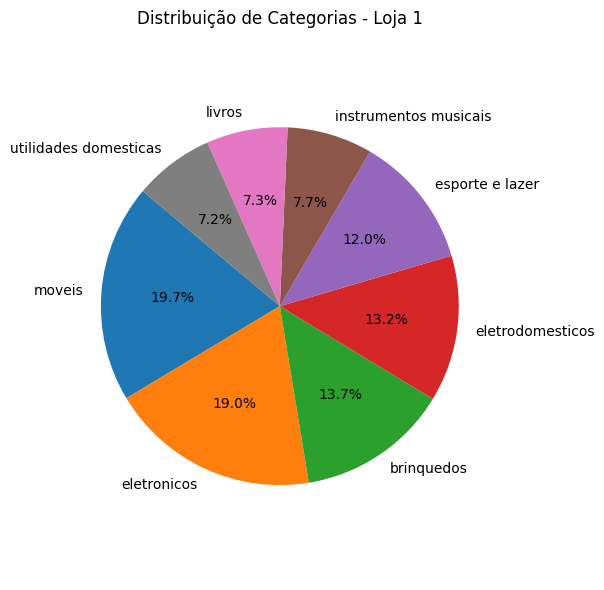

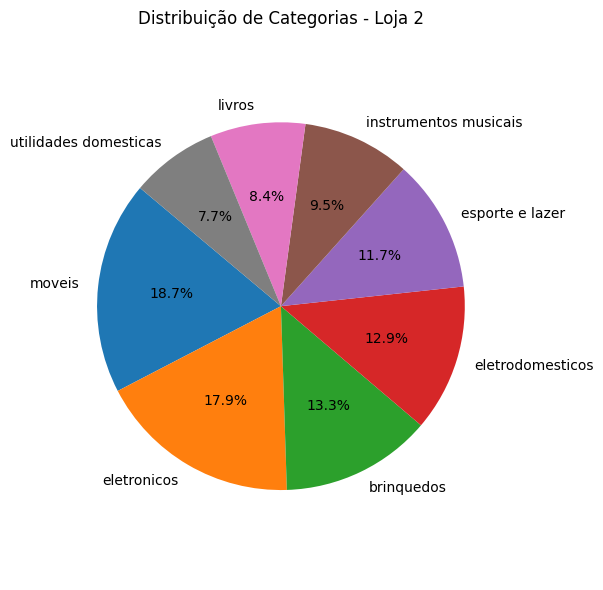

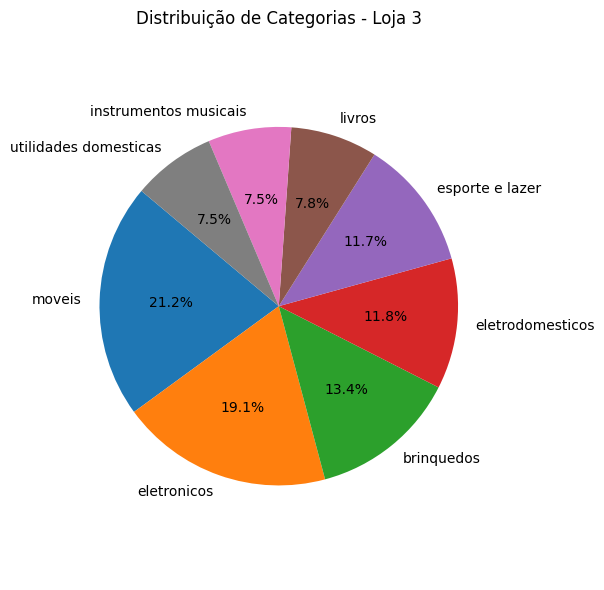

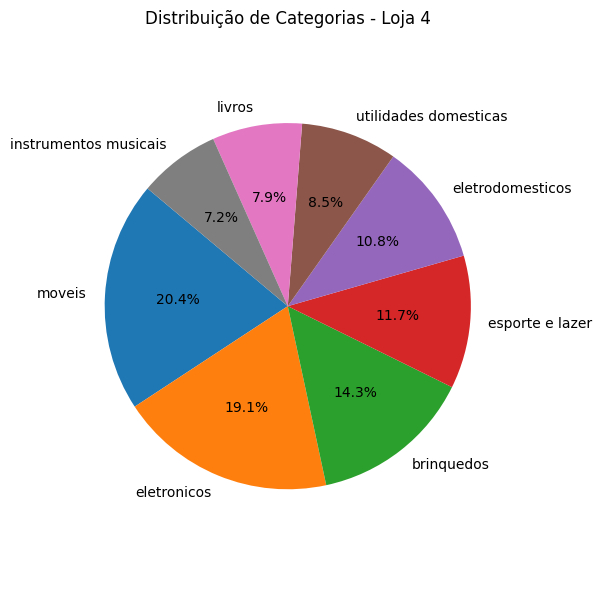

In [18]:
def grafico_pizza_categorias(df, nome_loja):
    categorias = df["Categoria do Produto"].value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(categorias, labels=categorias.index, autopct="%1.1f%%", startangle=140)
    plt.title(f"Distribuição de Categorias - {nome_loja}")
    plt.axis('equal')  # Deixa o gráfico circular
    plt.tight_layout()
    plt.show()

grafico_pizza_categorias(loja, "Loja 1")
grafico_pizza_categorias(loja2, "Loja 2")
grafico_pizza_categorias(loja3, "Loja 3")
grafico_pizza_categorias(loja4, "Loja 4")

#Gráfico 3 - Média de avaliações por loja (linha)

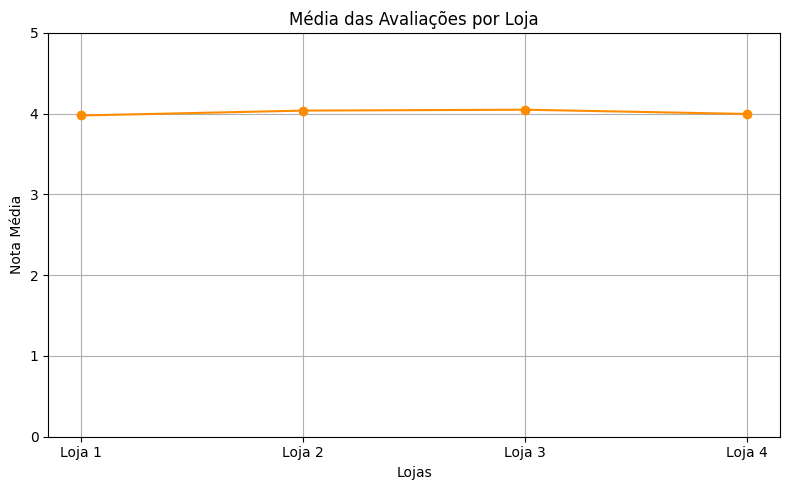

In [20]:
avaliacoes = {
    'Loja 1': loja["Avaliação da compra"].mean(),
    'Loja 2': loja2["Avaliação da compra"].mean(),
    'Loja 3': loja3["Avaliação da compra"].mean(),
    'Loja 4': loja4["Avaliação da compra"].mean()
}

plt.figure(figsize=(8, 5))
plt.plot(list(avaliacoes.keys()), list(avaliacoes.values()), marker='o', linestyle='-', color='darkorange')
plt.title("Média das Avaliações por Loja")
plt.ylabel("Nota Média")
plt.ylim(0, 5)
plt.xlabel("Lojas")
plt.grid(True)
plt.tight_layout()
plt.show()

#Gráfico 4 - Custo médio de frete por loja (dispersão)

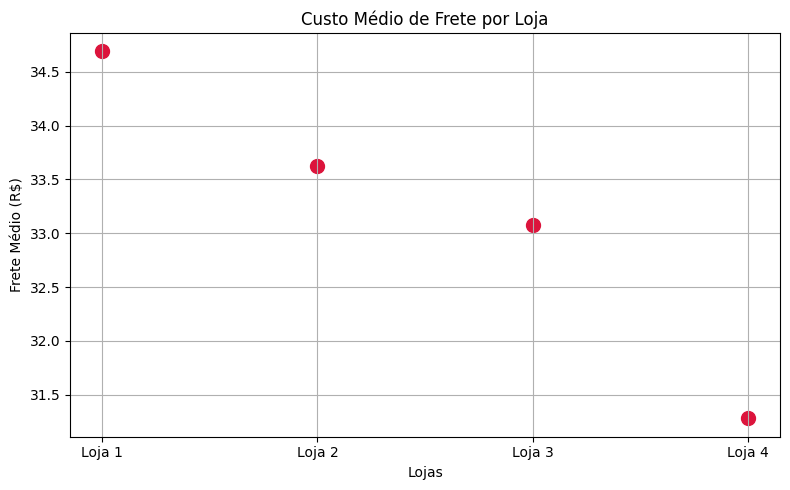

In [22]:
fretes = {
    'Loja 1': loja["Frete"].mean(),
    'Loja 2': loja2["Frete"].mean(),
    'Loja 3': loja3["Frete"].mean(),
    'Loja 4': loja4["Frete"].mean()
}

plt.figure(figsize=(8, 5))
plt.scatter(fretes.keys(), fretes.values(), color='crimson', s=100)
plt.title("Custo Médio de Frete por Loja")
plt.ylabel("Frete Médio (R$)")
plt.xlabel("Lojas")
plt.grid(True)
plt.tight_layout()
plt.show()

#Gráfico 5 - Participação no Faturamento Total por Loja (Pizza)

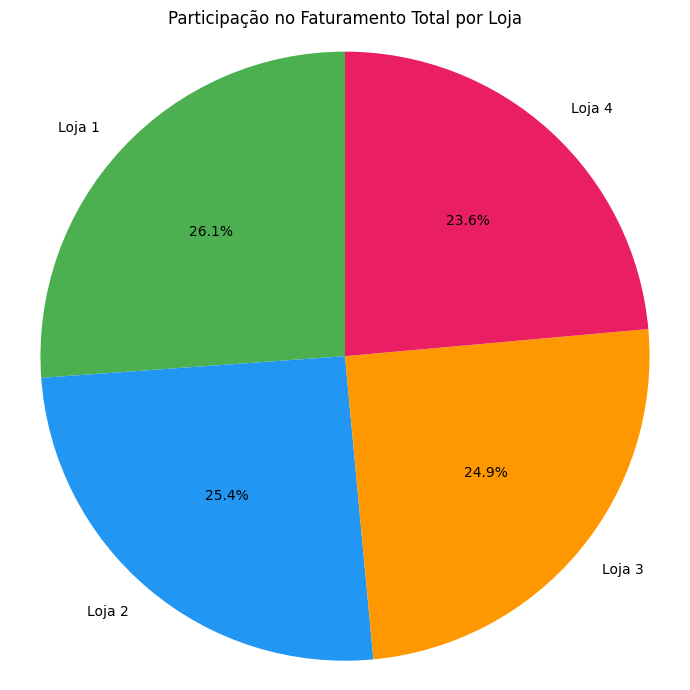

In [23]:
import matplotlib.pyplot as plt

# Faturamento total por loja
faturamentos = {
    'Loja 1': loja["Preço"].sum(),
    'Loja 2': loja2["Preço"].sum(),
    'Loja 3': loja3["Preço"].sum(),
    'Loja 4': loja4["Preço"].sum()
}

# Gráfico de pizza
plt.figure(figsize=(7, 7))
plt.pie(
    faturamentos.values(),
    labels=faturamentos.keys(),
    autopct="%1.1f%%",
    startangle=90,
    colors=["#4CAF50", "#2196F3", "#FF9800", "#E91E63"]
)
plt.title("Participação no Faturamento Total por Loja")
plt.axis("equal")  # Deixa o gráfico circular
plt.tight_layout()
plt.show()


# Relatório Final


## Introdução

Este relatório tem como objetivo identificar qual das quatro lojas apresenta o pior desempenho geral e, portanto, deve ser vendida. Para essa análise, foram considerados diversos critérios: faturamento total, categorias de produtos mais e menos vendidas, média de avaliações dos clientes, produtos com maior e menor volume de vendas, e o custo médio de frete. A partir desses dados e dos gráficos gerados, foi realizada uma análise comparativa para embasar a decisão final.

---

## Desenvolvimento

### 1. Faturamento Total

O primeiro critério avaliado foi o faturamento acumulado de cada loja:

- **Loja 1**: R$ 1.534.509,12  

- **Loja 2**: R$ 1.488.459,06  

- **Loja 3**: R$ 1.464.025,03

- **Loja 4**: R$ 1.384.497,58  

A **Loja 4** obteve o menor faturamento entre todas, indicando menor retorno financeiro. Este é um fator crucial, pois está diretamente relacionado à lucratividade da operação.

### 2. Categorias de Produtos Vendidos

Todas as lojas têm um padrão semelhante nas categorias mais populares, com **"Móveis"** e **"Eletrônicos"** liderando as vendas. No entanto, observando o total de vendas em cada categoria, a **Loja 4** tem números inferiores na maioria das categorias principais quando comparada às demais, mesmo que tenha um volume razoável de vendas em "Brinquedos" (338 vendas). Isso reforça seu desempenho abaixo da média.

### 3. Avaliação dos Clientes

A média das avaliações de clientes por loja foi:

- **Loja 1**: 3.98  
- **Loja 2**: 4.04  
- **Loja 3**: 4.05  
- **Loja 4**: 4.00  

Embora a **Loja 4** não tenha a pior avaliação, ela também não se destaca. A **Loja 3** foi a mais bem avaliada, o que indica maior satisfação do cliente — um fator importante para fidelização e reputação da marca.

### 4. Produtos Mais e Menos Vendidos

Os produtos mais vendidos foram variados, mas os menos vendidos são indicativos de baixa performance:

- **Loja 4**: Produto menos vendido foi **Guitarra** (33 vendas), semelhante a outros desempenhos baixos nas demais lojas. Contudo, o produto mais vendido da Loja 4 (**Cama box**, com 62 vendas) está abaixo dos destaques das demais lojas, como o livro “Iniciando em programação” (65 vendas na Loja 2), o que sugere uma performance ligeiramente inferior também nesse aspecto.

### 5. Custo Médio de Frete

- **Loja 1**: R$ 34.69  

- **Loja 2**: R$ 33.62  

- **Loja 3**: R$ 33.07  

- **Loja 4**: **R$ 31.28**  

Este é o único ponto onde a **Loja 4** se sobressai, apresentando o menor custo de frete médio. No entanto, essa vantagem não é suficiente para compensar o baixo faturamento e o desempenho geral abaixo das demais.

---

## Conclusão

Com base em todos os indicadores analisados, conclui-se que a **Loja 4 apresenta o pior desempenho geral e, portanto, é a mais recomendada para ser vendida**.

Apesar de seu custo logístico ser o menor entre as quatro lojas, a Loja 4 se destaca negativamente nos principais critérios:

- Apresenta o **menor faturamento total**, o que compromete diretamente a viabilidade econômica.  
- Tem um **desempenho de vendas inferior** em categorias principais e produtos.  
- Possui **avaliação média apenas regular**, sem diferencial competitivo.  
- Os **produtos de maior e menor saída** não compensam as deficiências nas outras métricas.

Dessa forma, vender a **Loja 4** representa uma decisão estratégica baseada em dados objetivos, liberando recursos que podem ser realocados para lojas com maior potencial de retorno.